# Building and Visualizing a Dataset from Twitter

In [258]:
from textblob import TextBlob
import tweepy
import nltk
import re
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 

In [259]:
# Your Twitter app credentials need to be added here - go to https://developer.twitter.com/en/apps
consumer_key = ''
consumer_key_secret = ''
access_token = ''
access_token_secret = ''

In [260]:
twitter_auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

In [261]:
api = tweepy.API(twitter_auth)

In [262]:
# Let's grab a bunch of tweets
tweets = api.search("cobh", count=100)

In [263]:
# Storing features from the tweets that will be useful for ML later
# This a broken in features relating to the tweet (prefixed with 'tweet_') and use related ones (prefixed with 'user_')
df = pd.DataFrame(columns=('tweet_text', 'tweet_sentiment', 'tweet_subjectivity',
                           'user_followers_count', 'user_friends_count',
                           'user_account_age', 'user_verified',
                           'user_favourites_count', 'user_tweets',
                           'tweet_retweeted', 'tweet_retweet_count', 'tweet_favorite_count'))

# Remove duplicates
df.sort_values("tweet_text", inplace = True) 
df.drop_duplicates(subset ="tweet_text", keep = False, inplace = True) 

# Note: Removing any URL's in the tweet text here also
for tweet in tweets:
    sentimentText = TextBlob(tweet.text)
    df = df.append({'tweet_text': re.sub(r'http\S+', '', tweet.text),
                    'tweet_sentiment': sentimentText.sentiment.polarity,
                    'tweet_subjectivity': sentimentText.sentiment.subjectivity,
                    'user_followers_count': tweet.user.followers_count, 
                    'user_friends_count': tweet.user.friends_count,
                    'user_account_age': tweet.user.created_at,  # TODO: Convert to number of days since account creation
                    'user_verified': tweet.user.verified,
                    'user_favourites_count': tweet.user.favourites_count,
                    'user_tweets': tweet.user.statuses_count,
                    'tweet_retweeted': tweet.retweeted,
                    'tweet_retweet_count': tweet.retweet_count,
                    'tweet_favorite_count': tweet.favorite_count},
                   ignore_index=True)
    
df.head()

,tweet_text,tweet_sentiment,tweet_subjectivity,user_followers_count,user_friends_count,user_account_age,user_verified,user_favourites_count,user_tweets,tweet_retweeted,tweet_retweet_count,tweet_favorite_count
0,Non Food item back in stock! 🙌\n\n🌟Beldray Air...,0.00,0.000,663,708,2016-02-17 17:53:17,False,2386,1089,False,0,0
1,@brythebaker Thanks Bryan for your lovely feed...,0.35,0.475,663,708,2016-02-17 17:53:17,False,2386,1089,False,0,0
2,RT @brythebaker: @GarveysSV_Cobh Your cakes ar...,-0.10,0.425,663,708,2016-02-17 17:53:17,False,2386,1089,False,1,0
3,RT @rtenews: Monday will see some easing in Co...,0.00,0.000,272,554,2010-03-14 14:48:01,False,6013,5663,False,8,0
4,RT @KieronOC: We are getting there 👍☘️ Cobh . ...,0.00,0.000,364,3,2011-09-21 22:01:14,False,24283,395820,False,7,0


In [264]:
# Sentiment of the tweets - using TextBlob for this
print ("Total Tweet count: {}" .format(df.shape[0]))
print ("The average sentiment of the tweets is {} ".format(df["tweet_sentiment"].mean()))

positive_tweets = [tweet for index, tweet in enumerate(df) if df['tweet_sentiment'][index] > 0]
neutral_tweets = [tweet for index, tweet in enumerate(df) if df['tweet_sentiment'][index] == 0]
negative_tweets = [tweet for index, tweet in enumerate(df) if df['tweet_sentiment'][index] < 0]

print("\nPercentage of positive tweets: {}%".format(len(positive_tweets)*100/len(df)))
print("Percentage of neutral tweets: {}%".format(len(neutral_tweets)*100/len(df)))
print("Percentage of negative tweets: {}%".format(len(negative_tweets)*100/len(df)))

Total Tweet count: 100
The average sentiment of the tweets is 0.23637500000000003 

Percentage of positive tweets: 2.0%
Percentage of neutral tweets: 9.0%
Percentage of negative tweets: 1.0%


There are 11319 words in all tweets.
There are 9393 words in  all tweets with stopwords removed.


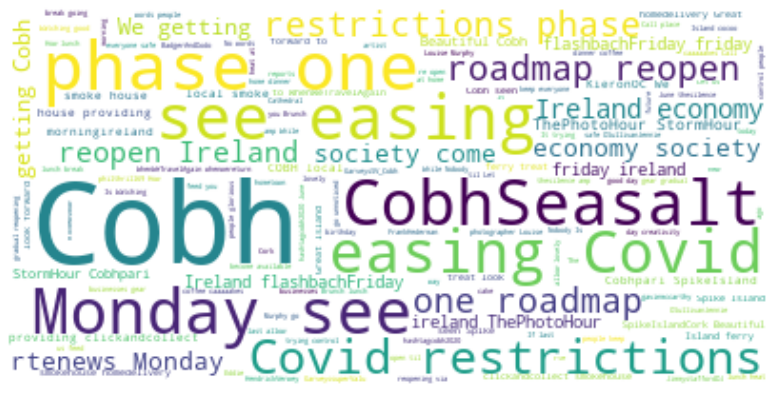

In [265]:
# Setup stop words
stop_words = stopwords.words('english') 
new_stopwords = ['RT']
stop_words.extend(new_stopwords)
stop_words = set(stop_words)

# Remove stopwords
text = " ".join(review for review in df.tweet_text)
clean_text = " ".join(word for word in text.split() if word not in stop_words)

print ("There are {} words in all tweets.".format(len(text)))
print ("There are {} words in  all tweets with stopwords removed.".format(len(clean_text)))

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(clean_text)

plt.figure( figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')